# <font color='#d50283'>IT Academy - Data Science</font>
##  S11 T01: Aprenentatge No Supervisat - Agrupació
### Luis Ortas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

import math
import statistics

In [2]:
df = pd.read_csv("DelayedFlights.csv")


df.drop(['Unnamed: 0','Year'],axis=1,inplace=True)

df.head(5)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,1,3,4,628.0,620,804.0,750,WN,448,N428WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [3]:
# columnas categoricas y columnas numericas

num=['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 
       'Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
cat=['Origin','UniqueCarrier']

In [4]:
df_cl=df[num].copy()
#Eliminamos nulos

for i in num:
    df_cl[i].fillna(df_cl[i].median(), inplace = True)
    
df_cl.isna().sum()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Distance             0
TaxiIn               0
TaxiOut              0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

***
## Exercici 1
Agrupa els diferents vols utilitzant l'algorisme de K-means

In [19]:
num=['ArrTime', 'Distance', 'TaxiIn',
       'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'DepDelay', 'ArrDelay']
df_sample=df_cl[num].sample(10000) # tomaremos 1000 observaciones para simplificar los calculos.

In [20]:
# aplicamos standarScaler.
scaler = StandardScaler()
scaler = scaler.fit_transform(df_sample)


#### Calculamos el númro óptimo de clusters

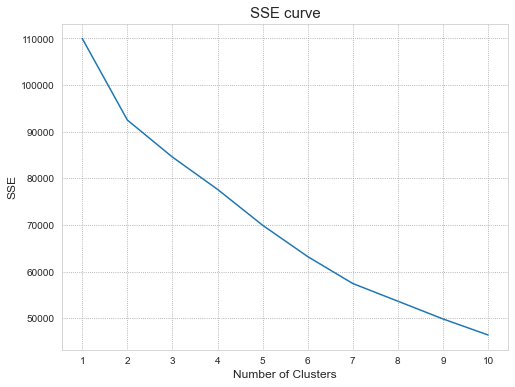

In [21]:
kmeans_kwargs = {"init": "k-means++",
    "n_init": 10,
    "max_iter": 100,
    "random_state": 42}
sse = []
for k in range(1, 11):
    model1elbow = KMeans(n_clusters=k, **kmeans_kwargs)
    model1elbow.fit(scaler)
    sse.append(model1elbow.inertia_)

plt.figure(figsize=(8, 6)) 
sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":"})
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.title("SSE curve", fontsize = 15)
plt.xlabel("Number of Clusters",fontsize = 12)
plt.ylabel("SSE",fontsize = 12)
plt.show()

In [22]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

5

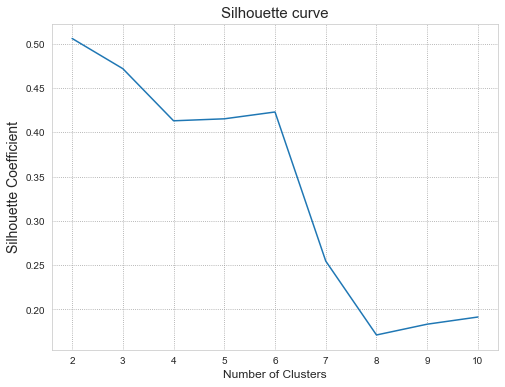

In [24]:
silhouette_coefficients = []
for k in range(2, 11):
    model1silhouette = KMeans(n_clusters=k, **kmeans_kwargs)
    model1silhouette.fit(scaler)
    score1 = silhouette_score(scaler, model1silhouette.labels_)
    silhouette_coefficients.append(score1)

plt.figure(figsize=(8, 6)) 
sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":"})
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.title("Silhouette curve", fontsize = 15)
plt.xlabel("Number of Clusters",fontsize = 12)
plt.ylabel("Silhouette Coefficient",fontsize = 14)
plt.show()

#### KMenans número de clusters 5

In [26]:
#KMeans
model1 = KMeans(init="k-means++",n_clusters=5,n_init=10,max_iter=300,random_state=42)
model1.fit(scaler)

KMeans(n_clusters=5, random_state=42)

In [27]:
model1.inertia_

69945.27837313726

In [28]:
model1.inertia_

69945.27837313726

In [29]:
model1.n_iter_

17

In [30]:
centers1 = model1.cluster_centers_
centers1

array([[ 1.64839456e-01, -3.62202675e-02,  9.40953097e-01,
         1.74358846e+00, -2.36151516e-01,  1.36496479e+00,
         2.80649135e+00, -1.97105556e-02, -2.45178438e-01,
         1.11623498e+00,  1.56129340e+00],
       [ 1.26135612e-02,  7.74518191e-03, -6.98753301e-02,
        -1.24040510e-01, -1.13777586e-01, -8.82334590e-02,
        -1.76863698e-01, -1.02601862e-02, -2.26617662e-01,
        -3.17527869e-01, -3.35468705e-01],
       [-3.51737759e-01,  4.64267798e-02,  7.29777067e-02,
         7.38072739e-02,  4.47279141e+00, -1.24332790e-01,
        -1.82327726e-01, -3.47616189e-02, -3.37594671e-01,
         2.72801988e+00,  2.58974383e+00],
       [-1.33249171e-01, -6.99582708e-02,  4.12503495e-03,
        -2.48606970e-02, -2.25260237e-01, -4.86965198e-02,
        -1.75042900e-01, -2.15461005e-02,  2.72638769e+00,
         1.54840449e+00,  1.45256191e+00],
       [ 3.97870154e-01, -7.73804741e-01,  4.48299192e-01,
        -4.48249014e-01, -3.51774561e-01, -1.45106426e-01,
  

In [31]:
labels= model1.labels_
labels

array([1, 1, 0, ..., 3, 3, 0])

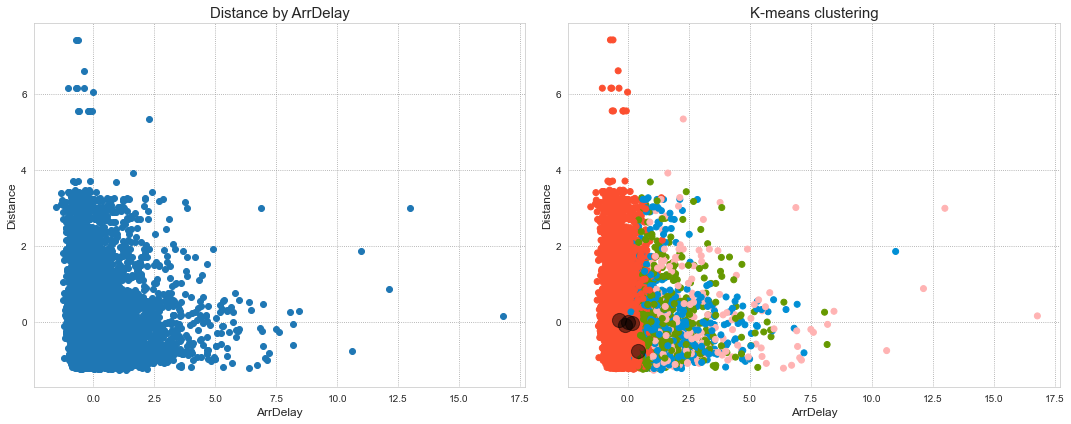

In [33]:
df = pd.DataFrame(scaler,
                 columns=['ArrTime', 'Distance', 'TaxiIn',
       'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'DepDelay', 'ArrDelay'])

df['Label']=labels

#Visualización de clusters. 
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":"})

fte_colors1 = {0: "#008fd5",1: "#fc4f30",2: "#ffb3b3", 3:'#669900',4:'#1a9900'}
km_colors = [fte_colors1[label] for label in model1.labels_]

axes[0].scatter(df['ArrDelay'], df['Distance'])
axes[0].set_xlabel("ArrDelay",fontsize = 12)
axes[0].set_ylabel("Distance",fontsize = 12)
axes[0].set_title("Distance by ArrDelay", fontsize = 15)

axes[1].scatter(df['ArrDelay'], df['Distance'], c=km_colors)
axes[1].scatter(centers1[:, 0], centers1[:, 1], c='black', s=200, alpha=0.5)
axes[1].set_xlabel("ArrDelay",fontsize = 12)
axes[1].set_ylabel("Distance",fontsize = 12)
axes[1].set_title("K-means clustering", fontsize = 15)

plt.tight_layout();

#### Resumen estadistico de cada cluster:

In [34]:
for k in range(0,5):
  print(f'\nStatistical summary for cluster {k}')
  display(df[df['Label']==k].drop(columns=['Label']).describe(percentiles=[0.5]))


Statistical summary for cluster 0


,ArrTime,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDelay,ArrDelay
count,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000
mean,0.166867,-0.034891,0.942795,1.743672,-0.235956,1.367516,2.808141,-0.019685,-0.244652,1.118535,1.563278
std,1.113538,0.994844,2.303909,2.429371,0.427165,3.568629,2.550496,0.262388,0.711506,1.427401,1.240740
min,-2.949958,-1.263775,-1.145937,-1.186959,-0.351775,-0.145106,-0.361920,-0.034762,-0.556884,-0.691015,-0.316447
50%,0.530322,-0.236076,0.249020,0.955299,-0.351775,-0.145106,2.343705,-0.034762,-0.556884,0.869279,1.211687
max,1.432820,3.271544,18.981294,14.252073,2.794639,23.693668,20.152880,5.132506,4.667903,11.977091,10.977688



Statistical summary for cluster 1


,ArrTime,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDelay,ArrDelay
count,8341.000000,8341.000000,8341.000000,8341.000000,8341.000000,8341.000000,8341.000000,8341.000000,8341.000000,8341.000000,8341.000000
mean,0.012488,0.007646,-0.069885,-0.123823,-0.113806,-0.088240,-0.176623,-0.010263,-0.226657,-0.317519,-0.335382
std,0.923196,1.007480,0.812821,0.670778,0.438419,0.362010,0.352870,0.500414,0.386962,0.371691,0.392015
min,-2.949958,-1.247855,-1.145937,-1.260830,-0.351775,-0.145106,-0.361920,-0.034762,-0.556884,-0.691015,-1.528414
50%,0.170419,-0.276759,-0.348819,-0.300507,-0.297054,-0.145106,-0.293423,-0.034762,-0.324671,-0.449541,-0.404270
max,1.432820,7.430098,6.825244,4.870460,2.356878,4.829380,2.583444,21.104061,1.445951,2.262399,1.404899



Statistical summary for cluster 2


,ArrTime,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDelay,ArrDelay
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,2.830000e+02,283.000000,283.000000,283.000000
mean,-0.351738,0.046427,0.072978,0.073807,4.472791,-0.124333,-0.182328,-3.476162e-02,-0.337595,2.728020,2.589744
std,1.261113,1.083930,0.854184,0.825712,2.893935,0.283010,0.366254,1.390237e-17,0.884844,2.094572,1.961820
min,-2.948131,-1.274388,-1.145937,-1.039217,1.919116,-0.145106,-0.361920,-3.476162e-02,-0.556884,0.925004,0.895521
50%,-0.125542,-0.274990,-0.149539,-0.152765,3.588083,-0.145106,-0.361920,-3.476162e-02,-0.556884,2.113800,1.949406
max,1.354262,5.346399,5.031728,6.200138,23.971374,4.441758,2.446450,-3.476162e-02,7.483483,17.902496,16.791620



Statistical summary for cluster 3


,ArrTime,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDelay,ArrDelay
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,-0.133249,-0.069958,0.004125,-0.024861,-0.225260,-0.048697,-0.175043,-0.021546,2.726388,1.548404,1.452562
std,1.450576,0.884926,0.858364,0.903114,0.329565,0.479652,0.387190,0.277925,1.568587,1.035797,1.002604
min,-2.949958,-1.247855,-1.145937,-1.039217,-0.351775,-0.145106,-0.361920,-0.034762,0.691260,0.051982,0.351014
50%,0.426187,-0.280297,-0.149539,-0.300507,-0.351775,-0.145106,-0.361920,-0.034762,2.215156,1.240778,1.158992
max,1.357916,3.687222,5.231007,8.490138,2.356878,6.444474,3.439654,7.481264,13.985440,8.856502,8.167328



Statistical summary for cluster 4


,ArrTime,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDelay,ArrDelay
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000
mean,0.397870,-0.773805,0.448299,-0.448249,-0.351775,-0.145106,-0.36192,61.972450,-0.556884,1.686576,1.580547
std,0.463766,0.297681,1.690943,0.000000,0.000000,0.000000,0.00000,11.293595,0.000000,0.499110,0.422285
min,0.069938,-0.984297,-0.747378,-0.448249,-0.351775,-0.145106,-0.36192,53.986673,-0.556884,1.333653,1.281946
50%,0.397870,-0.773805,0.448299,-0.448249,-0.351775,-0.145106,-0.36192,61.972450,-0.556884,1.686576,1.580547
max,0.725802,-0.563312,1.643976,-0.448249,-0.351775,-0.145106,-0.36192,69.958228,-0.556884,2.039500,1.879147


***
## Exercici 2
Agrupa els diferents vols utilitzant l'algorisme de clustering jeràrquic.

In [36]:
df_sample=df_cl[num].sample(1000)

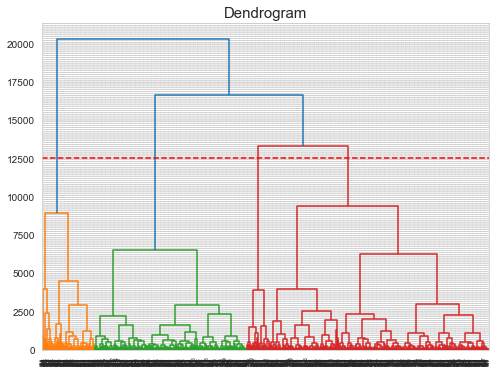

In [44]:
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid', {"grid.color": ".8", "grid.linestyle": ":"})
plt.rcParams['lines.linewidth'] = 1.5
plt.title("Dendrogram", fontsize = 15)  
dend = shc.dendrogram(shc.linkage(df_sample, method='ward'))
plt.axhline(y=12500, color='r', linestyle='--')
plt.show()

#### El número de cluster es 

In [41]:
model2 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
model2.fit(df_sample)
model2.labels_

array([3, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 1, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0,
       0, 1, 2, 0, 2, 0, 0, 0, 2, 0, 1, 3, 2, 1, 1, 0, 2, 2, 3, 0, 2, 2,
       0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 3, 0, 0, 0, 0, 2, 1,
       0, 2, 1, 0, 3, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       0, 0, 0, 3, 3, 0, 0, 2, 2, 0, 0, 0, 3, 2, 2, 0, 0, 2, 3, 0, 2, 1,
       0, 0, 2, 0, 2, 0, 3, 0, 0, 3, 0, 2, 2, 1, 2, 0, 0, 0, 0, 3, 2, 2,
       0, 0, 3, 0, 0, 0, 0, 3, 3, 2, 0, 0, 0, 0, 2, 2, 2, 3, 0, 2, 0, 0,
       2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 2, 0, 1, 2, 1,
       1, 0, 0, 2, 1, 0, 1, 0, 2, 2, 1, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 0, 2,
       2, 2, 3, 1, 3, 0, 2, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 3,
       0, 2, 0, 2, 0, 3, 2, 3, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 2, 0, 2, 2, 3, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2,
       2, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 3, 1, 0, 2,

In [42]:
labels=model2.fit_predict(df_sample)

In [43]:
# Statistical summary of each cluster
df_hierachical=df_sample.copy()
df_hierachical['Label']=labels

for k in range(0,3):
  print(f'\nStatistical summary for group {k}')
  display(df_hierachical[df_hierachical.Label==k].drop(columns=['Label']).describe(percentiles=[0.5]))


Statistical summary for group 0


,ArrTime,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDelay,ArrDelay
count,489.00000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000
mean,1412.95092,579.848671,6.435583,16.762781,15.071575,1.638037,6.744376,0.061350,13.128834,34.852761,33.642127
std,288.06702,347.300175,4.106228,11.454694,46.808042,11.185922,15.516718,1.086579,22.654157,51.654975,54.897938
min,706.00000,76.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,-21.000000
50%,1426.00000,493.000000,6.000000,13.000000,2.000000,0.000000,2.000000,0.000000,8.000000,20.000000,19.000000
max,2244.00000,1616.000000,35.000000,103.000000,622.000000,146.000000,149.000000,23.000000,204.000000,622.000000,660.000000



Statistical summary for group 1


,ArrTime,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDelay,ArrDelay
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.0,117.000000,117.000000,117.000000
mean,1617.230769,2018.188034,8.564103,19.162393,10.598291,1.076923,9.598291,0.0,16.547009,38.222222,34.205128
std,600.382901,518.312529,7.790782,11.942360,20.066725,7.623867,19.693803,0.0,31.786870,38.920589,40.895691
min,3.000000,1302.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.0,0.000000,6.000000,-27.000000
50%,1756.000000,1916.000000,6.000000,16.000000,2.000000,0.000000,2.000000,0.0,8.000000,25.000000,24.000000
max,2355.000000,3972.000000,50.000000,73.000000,126.000000,78.000000,112.000000,0.0,215.000000,217.000000,215.000000



Statistical summary for group 2


,ArrTime,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDelay,ArrDelay
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.0,342.000000,342.000000,342.000000
mean,2096.842105,606.277778,6.880117,19.982456,9.467836,2.292398,13.859649,0.0,23.953216,47.611111,47.722222
std,152.757580,294.492718,4.864765,15.797833,20.364792,14.111284,39.129354,0.0,35.907312,48.503629,53.008620
min,1722.000000,106.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.0,0.000000,6.000000,-18.000000
50%,2117.500000,588.000000,5.000000,15.500000,2.000000,0.000000,2.000000,0.0,8.000000,30.000000,30.000000
max,2400.000000,1442.000000,35.000000,132.000000,169.000000,128.000000,308.000000,0.0,254.000000,305.000000,308.000000


***
## Exercici 3
Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

#### Compararemos el rendimiento de KMEAN y DBSCAN


In [55]:
#k-means with 4 clusters
model3 = KMeans(n_clusters=2)
model3.fit(scaler)
#dbscan - eps is the distance between two samples - neighborhood
model4 = DBSCAN(eps=4)
model4.fit(
    scaler)

DBSCAN(eps=4)

In [56]:
model3.labels_

array([0, 0, 1, ..., 1, 0, 1])

In [57]:
model4.labels_ = abs(model4.labels_)
model4.labels_ 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
kmeans_silhouette1 = silhouette_score(scaler, model3.labels_).round(2)
dbscan_silhouette1 = silhouette_score(scaler, model4.labels_).round(2)
print(kmeans_silhouette1,dbscan_silhouette1)

0.51 0.8


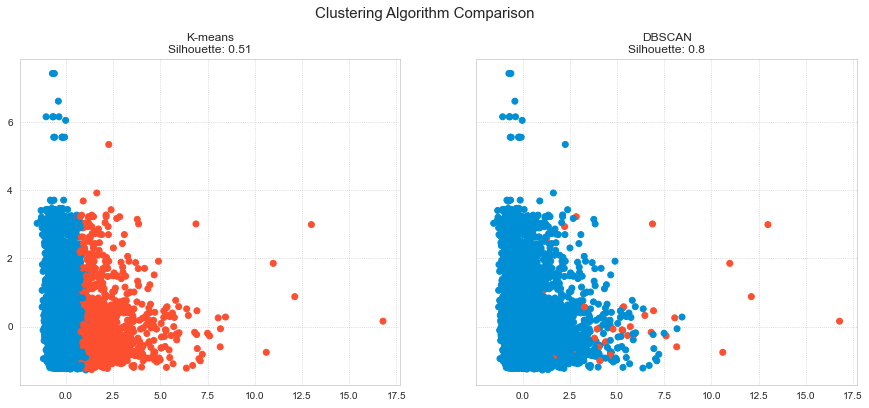

In [59]:
df = pd.DataFrame(scaler,
                 columns=['ArrTime', 'Distance', 'TaxiIn',
       'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'DepDelay', 'ArrDelay'])


df['Label']=model3.labels_


a = df['ArrDelay']
b = df['Distance']

#plot the data and cluster silhouette comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharex=True, sharey=True)
fig.suptitle("Clustering Algorithm Comparison", fontsize=15, y=1)
fte_colors1 = {0: "#008fd5",1: "#fc4f30"}
fte_colors2 = {0: "#008fd5",1: "#fc4f30"}

#the kmeans plot
km_colors = [fte_colors1[label] for label in model3.labels_]
ax1.scatter(a, b, c=km_colors)

ax1.set_title(f"K-means\nSilhouette: {kmeans_silhouette1}",fontsize=12)
#the dbscan plot
db_colors = [fte_colors2[label] for label in model4.labels_]
ax2.scatter(a, b, c=db_colors)
ax2.set_title(f"DBSCAN\nSilhouette: {dbscan_silhouette1}",fontsize=12)

plt.show()

### Reducción de dimensiónes.

#### Cantidad mínima de componentes principales de modo que se retenga el 95 % de la varianza

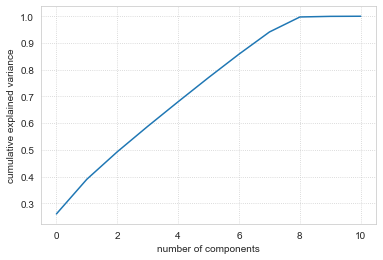

In [61]:
#PCA
pca = PCA().fit(scaler)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [63]:
pca = PCA(.95)
pca.fit(scaler)

pca.n_components_

9

#### 9 Caracteristicas retiene el 95% de la varianza

***
#### Reduciremos a dos caracteriscas para representar los clusters. Realizaremos el ejercicio mediante Pipeline

In [78]:
# recuperamos observaciones
df_sample=df_cl[num].sample(100000)
# aplicamos standarScaler.
scaler = StandardScaler()
scaler = scaler.fit_transform(df_sample)

In [79]:
## reducción a 2

#preprocessing pipeline with PCA

preprocessor = Pipeline([("scaler", MinMaxScaler()),("pca", PCA(n_components=2, random_state=42))])

clusterer = Pipeline([("kmeans",KMeans(n_clusters=4,
                                       init="random",n_init=10,
                                       max_iter=100,random_state=42))])


In [80]:
pipe = Pipeline([("preprocessor", preprocessor),("clusterer", clusterer)])
pipe.fit(scaler)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(init='random', max_iter=100,
                                         n_clusters=4, random_state=42))]))])

In [81]:
preprocessed_data = pipe["preprocessor"].transform(scaler)
predicted_labels = pipe["clusterer"]["kmeans"].labels_
silhouette_score(preprocessed_data, predicted_labels).round(2)

0.45

In [82]:
# 2 PCA components, k=4 clusters

df = pd.DataFrame(scaler,
                 columns=['ArrTime', 'Distance', 'TaxiIn',
       'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'DepDelay', 'ArrDelay'])


kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 100,
    "random_state": 42
}
kmeans = KMeans(n_clusters=4, **kmeans_kwargs)
kmeans.fit(preprocessed_data)


df['pca_1'] = preprocessed_data[:,0]
df['pca_2'] = preprocessed_data[:,1]
df['label'] = kmeans.labels_

centers_x = kmeans.cluster_centers_[:,0]
centers_y = kmeans.cluster_centers_[:,1]

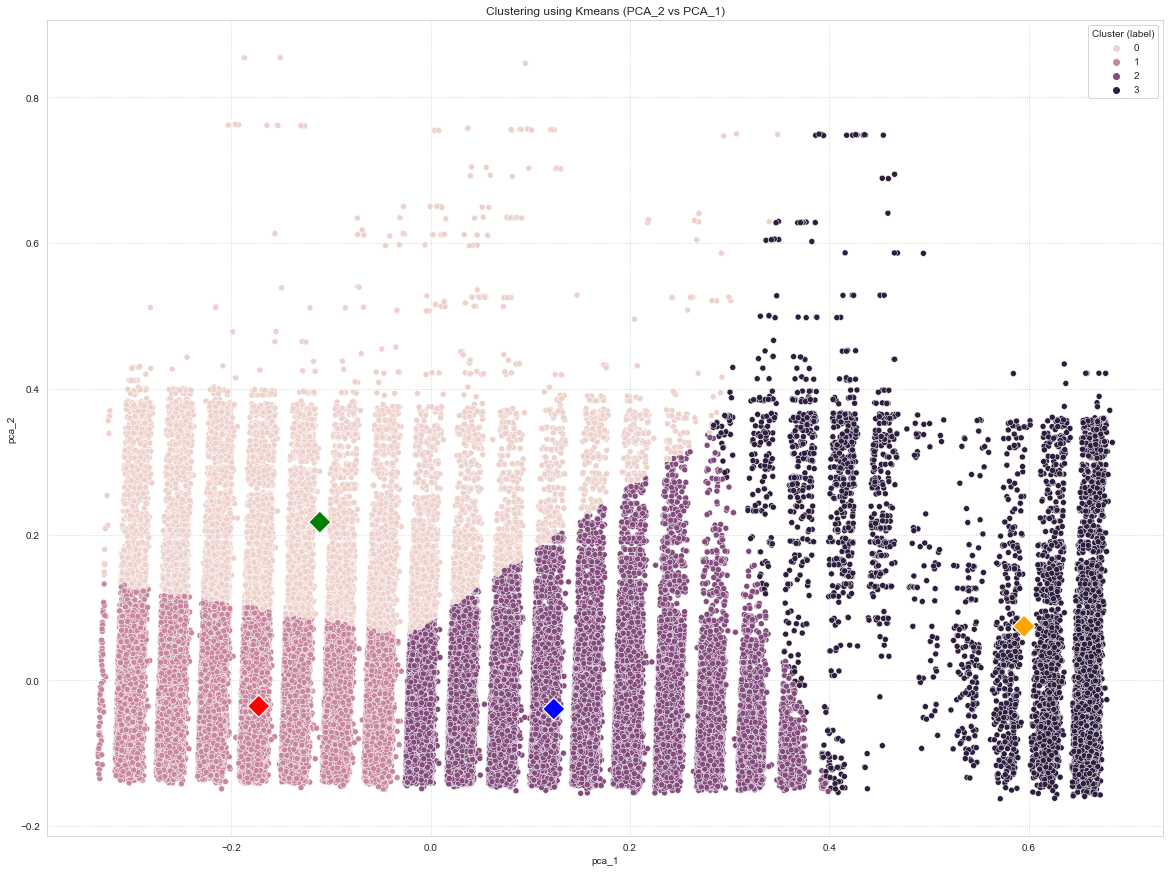

In [83]:
plt.figure(figsize=(20,15))
sns.scatterplot(data=df, x='pca_1', y='pca_2', hue='label')
sns.scatterplot(x=centers_x, y=centers_y, marker = "D", s=250,linewidths = 5, zorder = 10, c=['green', 'red','blue', 'orange'])
plt.title('Clustering using Kmeans (PCA_2 vs PCA_1)')
plt.legend(title='Cluster (label)')

***